# ⭐AIFFEL 대전 1기 Exploration 9. 나의 첫 번째 캐글 프로젝트⭐
>  프로젝트 소개: 부동산 가격 예측 캐글 대회 참여

***

# 🎯 프로젝트 목표
   * ## 부동산 데이터를 바탕으로 가격을 예측
   * ## 하이퍼파라미터 변경, 모델 변경 등 다양한 방법을 통해 캐글 점수 상승시켜보기
   * ## 데이터 전처리, 시각화, 모델 선정 및 설계, 평가 등 알기

***

# ✅프로젝트 순서
## 0. 개념 정리
## 1. 데이터 불러오기, 살펴보기
- 1-1. 데이터 불러오기  
      1-1-1. 데이터 불러오기  
      1-1-2. 데이터 요약(캐글 사이트)
- 1-2. 데이터 살펴보기  
      1-2-1. train.csv  
      1-2-2. test.csv  
      1-2-3. sample_submission.csv

## 2. 베이스 라인 모델
- 2-1. 베이스 라인 셋팅하기  
      2-1-1. 함수 작동 확인(내 사진)  
      2-1-2. 함수 작동 확인(연예인 사진)

## 3. 얼굴 영역의 임베딩 추출하기
- 3-1. 중요 개념 및 용어 정리  
- 3-2. 얼굴 임베딩 벡터 구하는 함수  
      3-2-1. 이미지 하나에 대한 얼굴 임베딩 벡터 구하는 함수  
      3-2-2. 폴더 내부에 있는 이미지 전체에 대한 얼굴 임베딩 벡터 구하는 함수

- 3-3. 얼굴 임베딩 사이의 거리 측정  
      3-3-1. 내 사진 2장과 연예인 사진 1장  
      3-3-2. 얼굴 영역 인식 및 임베딩 벡터 추출  
      3-3-3. list -> arrray 변경  
      3-3-4. 임베딩 벡터 간의 L2 거리측정  
      3-3-5. 파일명으로 임베딩 벡터 거리 측정 함수 작성

## 4. 얼굴 임베딩 공간의 시각화
- 4-1. 차원 축소

## 5. 가장 가까운 얼굴 찾아보기
- 5-1. 내 사진 하나를 기준으로 잡고 내 사진과 연예인들 사진과 임베딩 벡터 거리 차이를 기준으로 정렬
- 5-2. 입력한 사진과 가장 비슷한 사람 출력하는 함수

## 6. 시각화 해보기
- 닮은꼴 연예인 1등부터 5등까지 시각화(얼굴 부분만 확인해보기)

## 7. 루브릭 평가 및 회고
- 7-1. 루브릭 평가
- 7-2. 회고

***

## 0. 개념 정리
### 1) 캐글
- 데이터 사이언티스트들을 위한 경진대회 사이트  
[캐글 코리아와 함께하는 2nd ML 대회 - House Price Prediction](https://www.kaggle.com/c/2019-2nd-ml-month-with-kakr)
- 이번 대회의 점수 평가 기준: RMSE  

#### RMSE(Root Mean Squared Error)
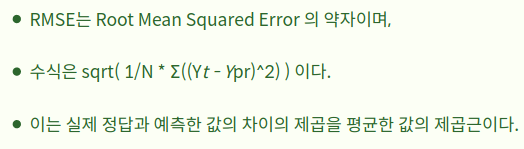

### 2) 베이스 라인
- 문제 해결을 시작할 때 쉽게 사용해볼 수 있는 샘플
보통 대회에서 Baseline은 제공이 되는 경우도, 아닌 경우도 있는데 이번 대회는 특히 교육적인 성격도 있어서 제공됨.
[베이스 라인](https://www.kaggle.com/kcs93023/2019-ml-month-2nd-baseline)

### 3) 블렌딩(blending)
- 여러 가지 모델을 종합해 결과를 얻는 기법

### 4) 앙상블(Ensemble)
- 여러 개의 학습 알고리즘을 사용하고, 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법
- 하나의 강한 머신러닝 알고리즘보다 여러 개의 약한 머신러닝 알고리즘이 낫다 라는 아이디어에서 출발.

#### 보팅(Voting)은 분류
#### 에버리징(Averaging)은 회귀

### 5) 파라미터, 하이퍼 파라미터
- 파라미터는 머신러닝이 학습을 진행하면서 손실함수의 값을 최소로 하기 위해 스스로 조절하는 변수이며
- 하이퍼 파라미터는 사람이 직접 조정하면서 최적의 가중치를 찾는 변수이다.

### 6) 앙상블 기법
> [출처](https://subinium.github.io/introduction-to-ensemble-1/#:~:text=%EC%95%99%EC%83%81%EB%B8%94(Ensemble)%20%ED%95%99%EC%8A%B5%EC%9D%80%20%EC%97%AC%EB%9F%AC,%EB%A5%BC%20%EA%B0%80%EC%A7%80%EA%B3%A0%20%EC%9D%B4%ED%95%B4%ED%95%98%EB%A9%B4%20%EC%A2%8B%EC%8A%B5%EB%8B%88%EB%8B%A4.)  

**여러 개의 학습 알고리즘을 사용하고, 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법**
- 앙상블 학습 유형: Voting, Bagging, Boosting, Stacking 등

#### 6-1) Voting
- 분류 문제에서 사용
1. 일정 수의 base model과 predict를 만든다.
  - 훈련 데이터를 나누어 같은 알고리즘 사용하거나
  - 훈련 데이터는 같지만 다른 알고리즘 사용하거나
  - 등등의 방법 사용
2. 다양한 방법으로 Voting 실시

#### 6-1-1) Majority Voting (Hard Voting)
- 각 모델은 test 데이터셋(또는 인스턴스)의 결과를 예측합니다. 그리고 예측값들의 다수결로 예측값을 정합니다.
- 이진 분류에 있어서는 과반수 이상이 선택한 예측값을 최종 예측으로 선택하는 것입니다.  
이런 다수결의 성격때문에 **max voting**, plurality voting 라고도 부릅니다.

#### 6-1-2) Weighted Voting (Soft Voting)
- 이번에는 test 데이터셋(또는 인스턴스)의 결과 가능성을 예측합니다. 그리고 이 가능성(가중치)를 특정 연산을 하여 분류 label의 확률값을 계산합니다.
- 이 방법에서 가중치의 연산은 원하는 방식으로 할 수 있고, 보통 평균을 사용합니다.  
보통 Majority Voting보다 유연한 결과를 얻을 수 있으며, 예측 성능이 좋아 더 많이 사용합니다.

#### 6-2) Averaging
- 회귀 문제에서 사용

##### 6-2-1) Simple Averaging
- 회귀 문제에서 사용하는 방법으로, 각 예측값을 평균내어 사용합니다. 이 방법은 경우에 따라 과대적합을 줄여주고, 더 부드러운 회귀모델을 만들어줍니다.

##### 6-2-2) Weighted Averaging
- 위에서 평균을 낼 때, 각 모델별 가중치를 두어 평균내는 방식입니다.

### 7) 배깅(bagging)
- Bootstrap Aggregating의 약자
- 배깅의 핵심은 평균을 통해 분산(variance)값을 줄여 모델을 더 일반화시킨다는 점
❗배깅에서 최종적으로 보팅을 사용❗
1. 일정 수의 base model을 만듭니다.
2. 모델들의 알고리즘은 모두 같습니다.
3. 각각의 모델은 훈련데이터셋에서 랜덤으로 만든 서브 데이터셋을 각각 사용합니다.  
3에서 서브 데이터셋을 만드는 과정: **부트스트래핑(bootstraping)** (각 서브데이터셋은 중첩가능)
-> 데이터 생성과 훈련이 개별 모델에서 진행되므로, 병렬 연산이 가능

#### 7-1) Bagging meta-estimator
- 랜덤 포레스트의 모체가 되는 알고리즘입니다. 위에서 언급한 방식을 그대로 사용하는 알고리즘

#### 7-2) Random Forest
- 여러 결정 트리(Decision Tree) 를 사용하여 보팅(soft voting)을 통해 예측을 결정하는 것
- Bagging meta-estimator과 다르게 결정트리만 사용하고, 특성(feature)을 랜덤으로 선택하여 Bagging을 진행  
결정 트리의 경우, 쉽고 직관적인 성격때문에 다른 앙상블 알고리즘에서도 많이 채택    
❗**장점: 앙상블 알고리즘 중 비교적 빠른 속도를 가지고 있으며, 다양한 분야에서 좋은 성능을 낸다는 점에서 매우 장점이 많은 알고리즘**❗  

❗**단점: 하이퍼파라미터가 많아 튜닝을 위한 시간이 많이 소모된다는 것, 하이퍼파라미터의 조정을 통한 성능의 향상이 비교적 미비**  

### 8) Boosting
- 여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측하며 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식
계속해서 분류기에게 가중치를 부스팅하면서 학습을 진행하기에 부스팅 방식으로 불립니다.  

❗**단점: 순차적인 연산이 필수적이므로 병렬 연산이 불가능, 대용량 데이터셋에서는 학습 시간이 매우 많이 필요**  
(참고) 최근 성능면에서 인정을 받아 **가장 많이 사용**하는 부스팅 계열 알고리즘으로 `XGBoost` 와 `LightGBM` 이 있습니다.  

#### 8-1) AdaBoost(에이다 부스트)
- Adaptive boosting의 약자로 **오류 데이터에 가중치를 부여**하며 부스팅을 수행하는 대표적인 알고리즘  
❗메인 아이디어는 잘못 분류한 데이터에 가중치를 부여하여, 다음 분류기는 이를 더 잘 분류하게 만드는 것❗  
 단점: 오류 데이터에 가중치를 부여하기 때문에 이상치(outlier)에 민감  

#### 8-2) Gradient Boost(그래디언트 부스트)
- 가중치 업데이트를 **경사하강법(Gradient Descent)** 진행 (AdaBoost와 비슷)  
**단점: 평균적으로 랜덤 포레스트보다 좋은 예측 성능을 가지지만, 하이퍼파라미터 튜닝 노력이 필요하고 그만큼 수행 시간이 오래걸림**  
**순차적인 진행때문에 병렬 수행이 불가능**
(참고) XGBoost, LightGBM의 기본 아이디어가 된다. --> 잘 사용하지 않음

#### 8-3) XGBoost(eXtra Gradient Boost)
- 장점:GBM에 비해 빠르고, 과적합 규제 등의 장점
- 분류/회귀 모두 예측 성능이 우수하고, 자체 내장 교차 검증, 결손값 처리 등의 장점
- 병렬 CPU를 이용하여 GBM보다 빠른 수행 --> 속도를 기대하려면 multi-CPU core가 필요
- 단점: GBM보다는 빠르지만 여전히 느린 알고리즘입니다. 심지어 GridSearchCV를 이용하여 하이퍼파라미터 튜닝을 수행하면 시간이 너무 오래 걸림

#### 8-4) LightGBM  
- Light한 GBM  
- XGBoost에 비해 훨씬 빠르며, 메모리 사용량도 상대적으로 적다  
- 예측 성능 자체도 큰 차이는 없다.  
**단점: 적은 수(1만 건 이하)의 데이터셋에는 과대적합이 발생하기 쉽다는 단점**  
⭐메인 아이디어  
- GBM 계열의 트리 분할 방법에서 트리 균형 맞추는 과정을 생략하며 성능을 높였다는 점  
- 대부분의 트리 기반 알고리즘은 트리의 깊이를 효과적으로 줄이기 위해 균형 트리 분할(Level Wise) 방식을 사용합니다.  
- 균형 잡힌 트리는 과대적합에 강하지만 시간 비용이 크다.  
 **빠르고 높은 성능의 이유: 리프 중심 트리 분할(Leaf Wise) 방식을 사용해 비대칭이지만 예측 오류 손실 값을 줄이는 방식을 선택하여 트리를 분할**
 
#### 8-5) CatBoost
- 범주형 변수를 위해 만든 Boosting 알고리즘  
- 범주형 변수를 자동으로 처리하기 위해 만든 알고리즘  
(참고) - 범주형 변수의 경우에는 원-핫 인코딩을 할 경우에 많은 수의 특성이 생기기에 부스팅 알고리즘을 사용하는 경우, 매우 오랜 시간이 걸림


### 9) Stacking & Blending
#### 9-1) Stacking
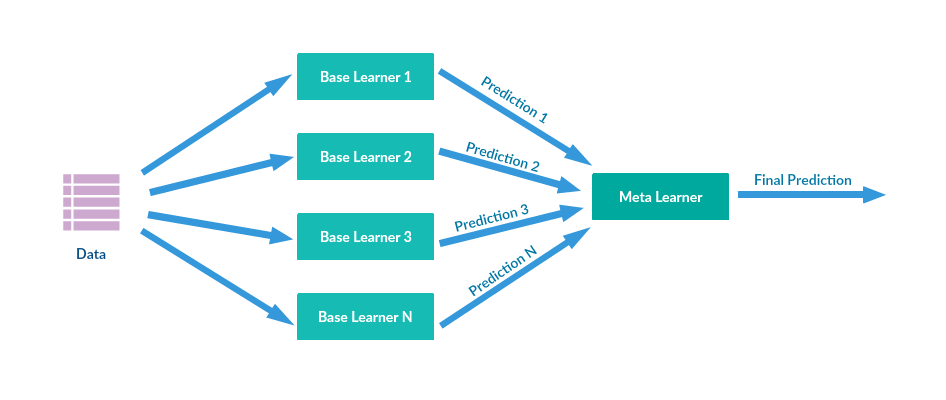
> 출처 : http://supunsetunga.blogspot.com/  

**머신러닝 알고리즘으로 훈련 데이터셋을 통해 새로운 데이터셋을 만들고, 이를 데이터셋으로 사용하여 다시 머신러닝 알고리즘을 돌리는 것입니다. 보통은 서로 다른 타입의 모델들을 결합**    
1. 개별적인 기반 모델 : 성능이 비슷한 여러 개의 모델
2. 최종 메타 모델 : 기반 모델이 만든 예측 데이터를 학습 데이터로 사용할 최종 모델
**즉, 여러 개의 개별 모델들이 생성한 예측 데이터 --> 최종 메타 모델이 학습할 별도의 학습 데이터 세트와 예측할 테스트 데이터 세트를 재 생성하는 기법**  

#### 9-2) Blending
- 스태킹과 매우 유사  
 **차이점: Stacking에서는 cross-fold-validation을 사용하고, Blending은 holdout validation을 사용**  
 그렇기 때문에 Blending의 결과는 holdout set에 과대적합이 된 결과를 얻을 가능성이 높다

### 10) Grid Search VS Random Search
**하이퍼파라미터 최적화 방법 중 하나**  
(다른 방법): Manual Search, Grid Search, Random Search, Bayesian Search  
- Random Search가 여러가지 면에서 유리합니다. 먼저 Random Search는 중요한 hyper-parameter를 더 많이 탐색
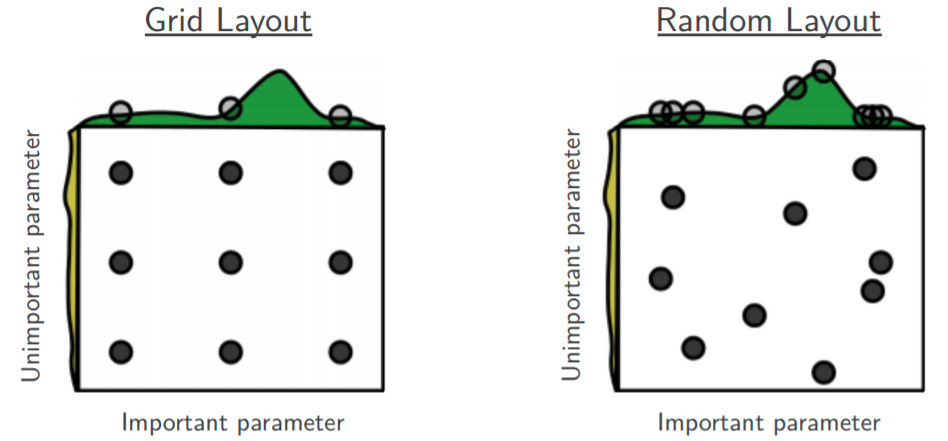
  
#### Grid Search: 중요한 hyper-parameter의 3개 지점을 탐색
- Grid Search는 중요하지 않은 hyper-parameter를 너무 많이 탐색
- 탐색을 중단하면 hyper-parameter의 일부 범위를 제외하고 탐색  

#### Random Search: 9개 지점을 탐색
- 중요한 parameter를 더 많이 탐색할 수 있기 때문에 최적화하기에 유리
- 언제든지 탐색을 중단할 수 있습니다. 중간에 멈추더라도 특정 범위에 편중된 탐색이 아니기 때문

**Grid Search가 Random Search와 같은 결과를 내기 위해서는 꽤 많은 횟수동안 수행해야 한다**  
❗그러나, 여전히 Grid Search는 많이 쓰이고 guideline을 개선하는 방식으로 사용❗  

#### 대중적인 지침
1. 경험적으로 중요한 hyper-parameter를 먼저 탐색하고 값을 고정합니다.
2. 덜 중요한 hyper-parameter를 나중에 탐색합니다.
3. 먼저 넓은 범위에 대해 hyper-parameter를 탐색하고 좋은 결과가 나온 범위에서 다시 탐색합니다.

**필요한 라이브러리 설치**

$ conda install -c conda-forge xgboost  

$ conda install -c conda-forge lightgbm  

$ conda install -c conda-forge missingno  

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 필요 라이브러리 설치 from 베이스라인 모델 ipynb
import warnings # 캐글에서 무시를 위한 패키지
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

from sklearn.model_selection import GridSearchCV

print('완료')

완료


***

## 1. 데이터 불러오기

## 1-1. 데이터 불러오기

> $ wget https://aiffelstaticprd.blob.core.windows.net/media/documents/kaggle-kakr-housing-data.zip

## 1-2. 데이터 요약(캐글 사이트)
- 부동산 데이터  


\<Data Fields>
1. ID : 집을 구분하는 번호
2. date : 집을 구매한 날짜
3. price : 집의 가격(Target variable)
4. bedrooms : 침실의 수
5. bathrooms : 화장실의 수
6. sqft_living : 주거 공간의 평방 피트(면적)
7. sqft_lot : 부지의 평방 피트(면적)
8. floors : 집의 층 수
9. waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
10. view : 집이 얼마나 좋아 보이는지의 정도
11. condition : 집의 전반적인 상태
12. grade : King County grading 시스템 기준으로 매긴 집의 등급
13. sqft_above : 지하실을 제외한 평방 피트(면적)
14. sqft_basement : 지하실의 평방 피트(면적)
15. yr_built : 지어진 년도
16. yr_renovated : 집을 재건축한 년도
17. zipcode : 우편번호
18. lat : 위도
19. long : 경도
20. sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)
21. sqft_lot15 : 2015년 기준 부지의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)

\<File 종류>
1. `train.csv` - 모델 학습용 파일
2. `test.csv` - 테스트용 파일
3. `sample_submission.csv` - 제출용 파일  
\> **`train`으로 학습을 진행, `test` 데이터에 대해 `Price`를 예측, sample_submission형식에 맞는 형태로 캐글 제출**

## 1-3. 데이터 살펴보기

In [28]:
data_dir = os.getenv('HOME')+'/1.AIFFEL_Study/Exploration/E09_My_First_Kaggle/data'

train_data_path = join(data_dir, 'train.csv')
sub_data_path = join(data_dir, 'test.csv')      # 테스트, 즉 submission 시 사용할 데이터 경로

print(train_data_path)
print(sub_data_path)

/home/aiffel-dj40/1.AIFFEL_Study/Exploration/E09_My_First_Kaggle/data/train.csv
/home/aiffel-dj40/1.AIFFEL_Study/Exploration/E09_My_First_Kaggle/data/test.csv


In [29]:
data = pd.read_csv(train_data_path)
sub = pd.read_csv(sub_data_path)
print('train data dim : {}'.format(data.shape))
print('sub data dim : {}'.format(sub.shape))

train data dim : (15035, 21)
sub data dim : (6468, 20)


### data(train) 확인

In [36]:
data.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,20140627T000000,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,20150115T000000,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


### sub(test) 확인

In [37]:
sub.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15035,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
1,15036,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2,15037,20140512T000000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
3,15038,20150415T000000,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
4,15039,20150312T000000,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


\>> **train 데이터 개수: 15,035개, 열은 21개**  
\>> **sub 데이터 개수: 6,468개, 열 20개 (학습한 결과로 test의 price를 예측해야함)**  

***

# 2. 모델링 (1) - Averaging Blending (from baseline)

### `y`에 가격 저장하기

In [30]:
y = data['price']
del data['price']

print(data.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


### `data`와 `sub` 합치기

In [31]:
train_len = len(data)
data = pd.concat((data, sub), axis=0)

print(len(data))

21503


In [32]:
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


### 결측치 찾기

<AxesSubplot:>

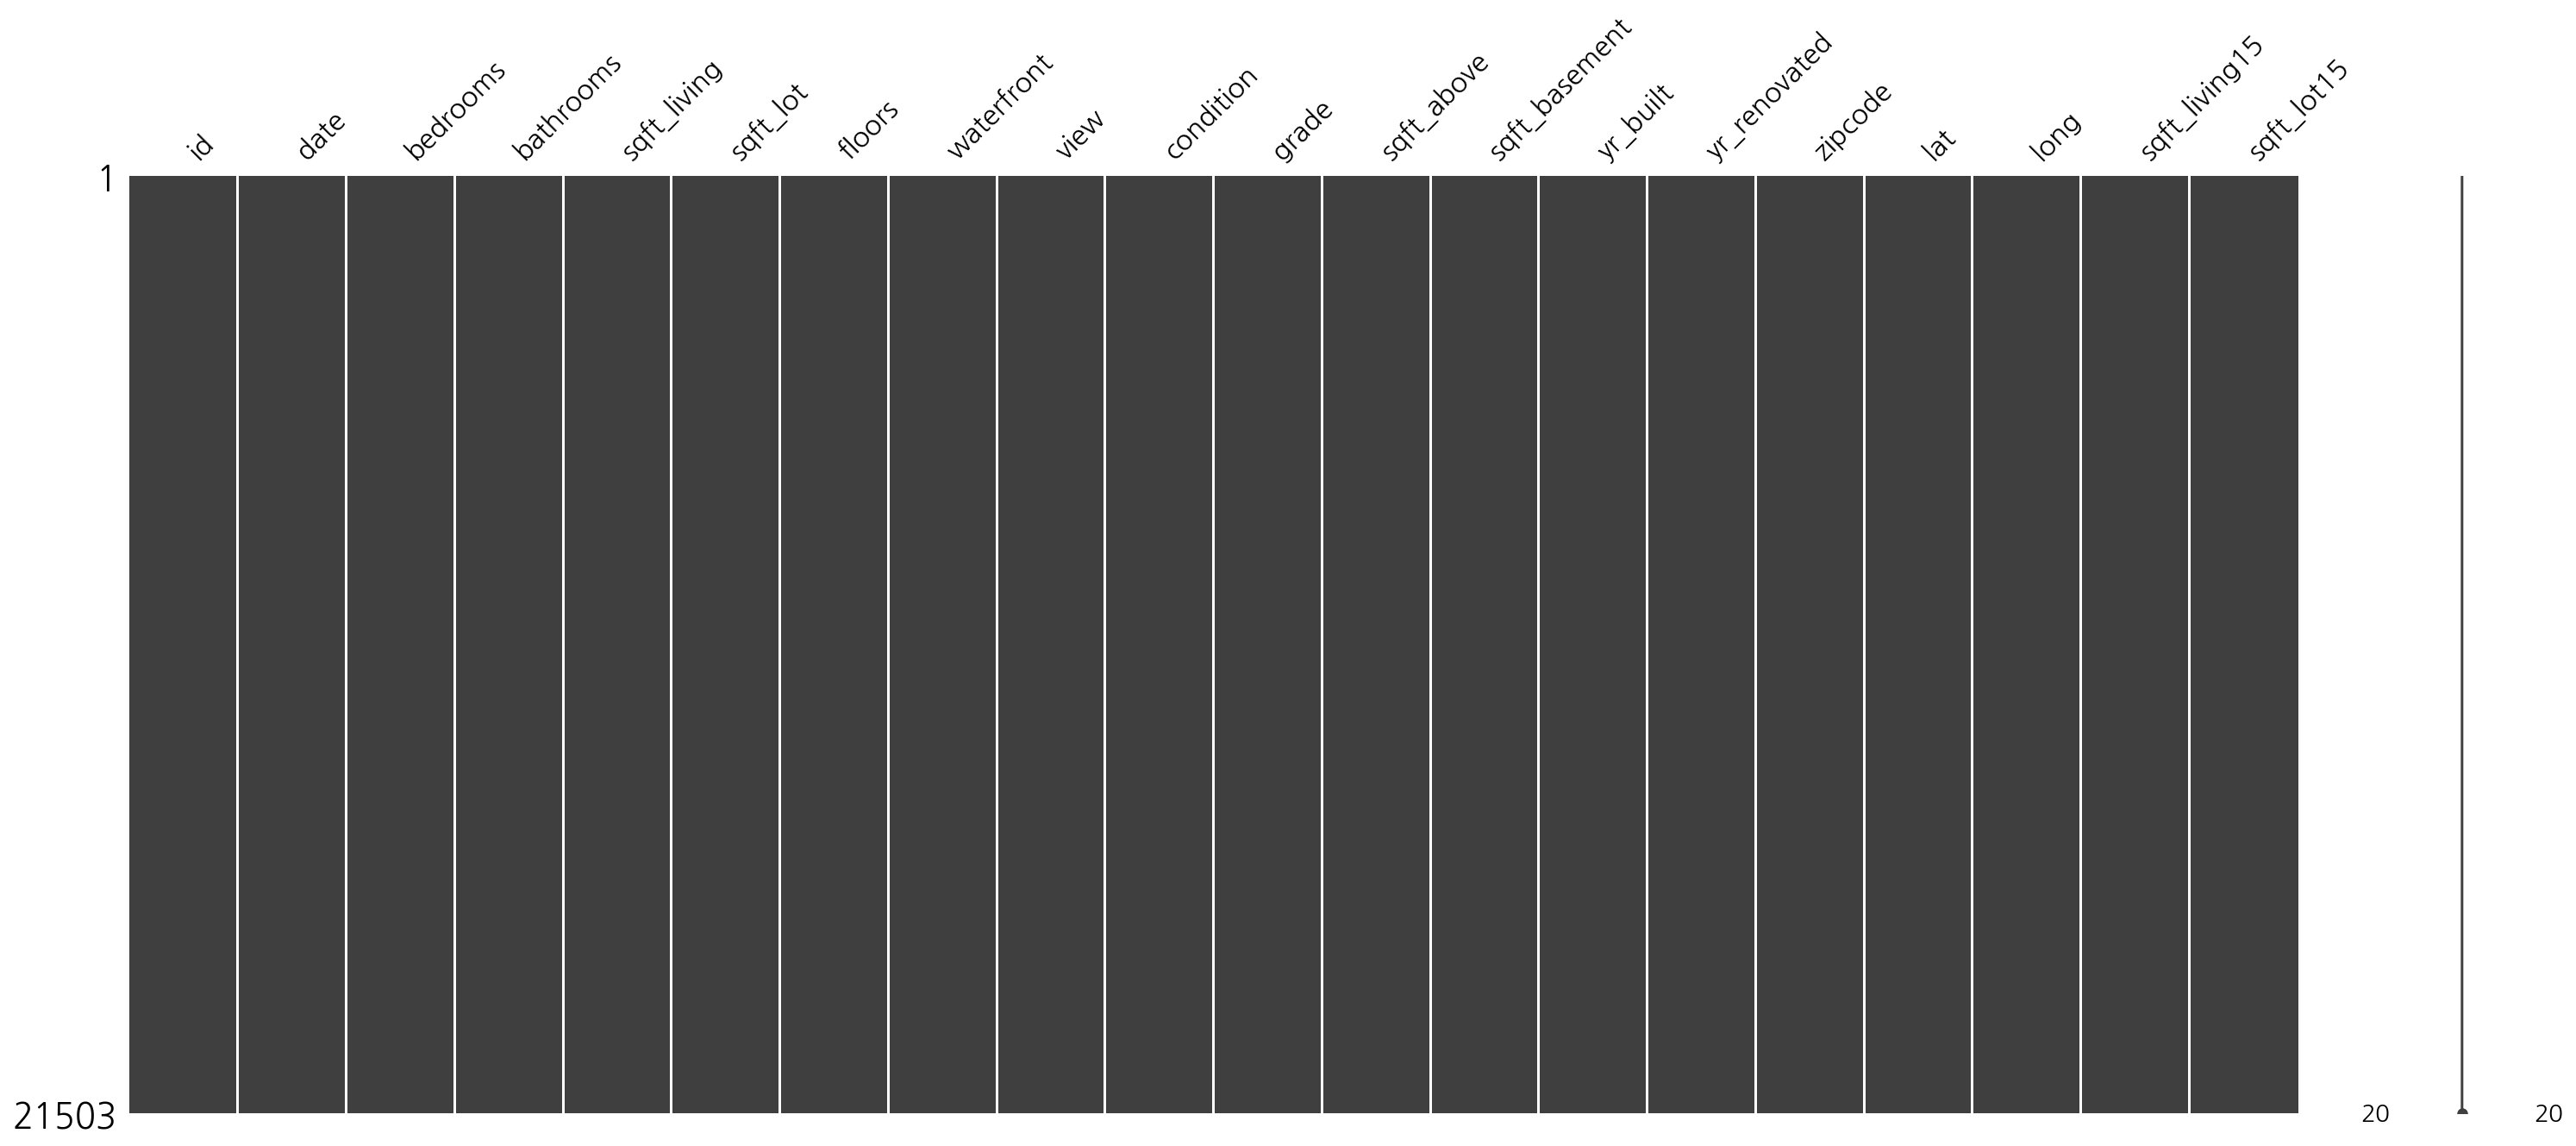

In [33]:
msno.matrix(data)

#### >> 결측치 없음!

In [34]:
for c in data.columns:
    print('{} : {}'.format(c, len(data.loc[pd.isnull(data[c]), c].values)))

id : 0
date : 0
bedrooms : 0
bathrooms : 0
sqft_living : 0
sqft_lot : 0
floors : 0
waterfront : 0
view : 0
condition : 0
grade : 0
sqft_above : 0
sqft_basement : 0
yr_built : 0
yr_renovated : 0
zipcode : 0
lat : 0
long : 0
sqft_living15 : 0
sqft_lot15 : 0


### `sub_id`에 `id`저장하고 데이터 프레임에서 삭제

In [35]:
sub_id = data['id'][train_len:]
del data['id']

print(data.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


### `date`컬럼 내용중 앞 6자리만 사용(YY/MM/DD)

In [38]:
data['date'] = data['date'].apply(lambda x : str(x[:6]))

data.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,201410,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,201502,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,201502,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,201406,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,201501,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


### 각 컬럼별 데이터 분포 확인 (전처리 전)

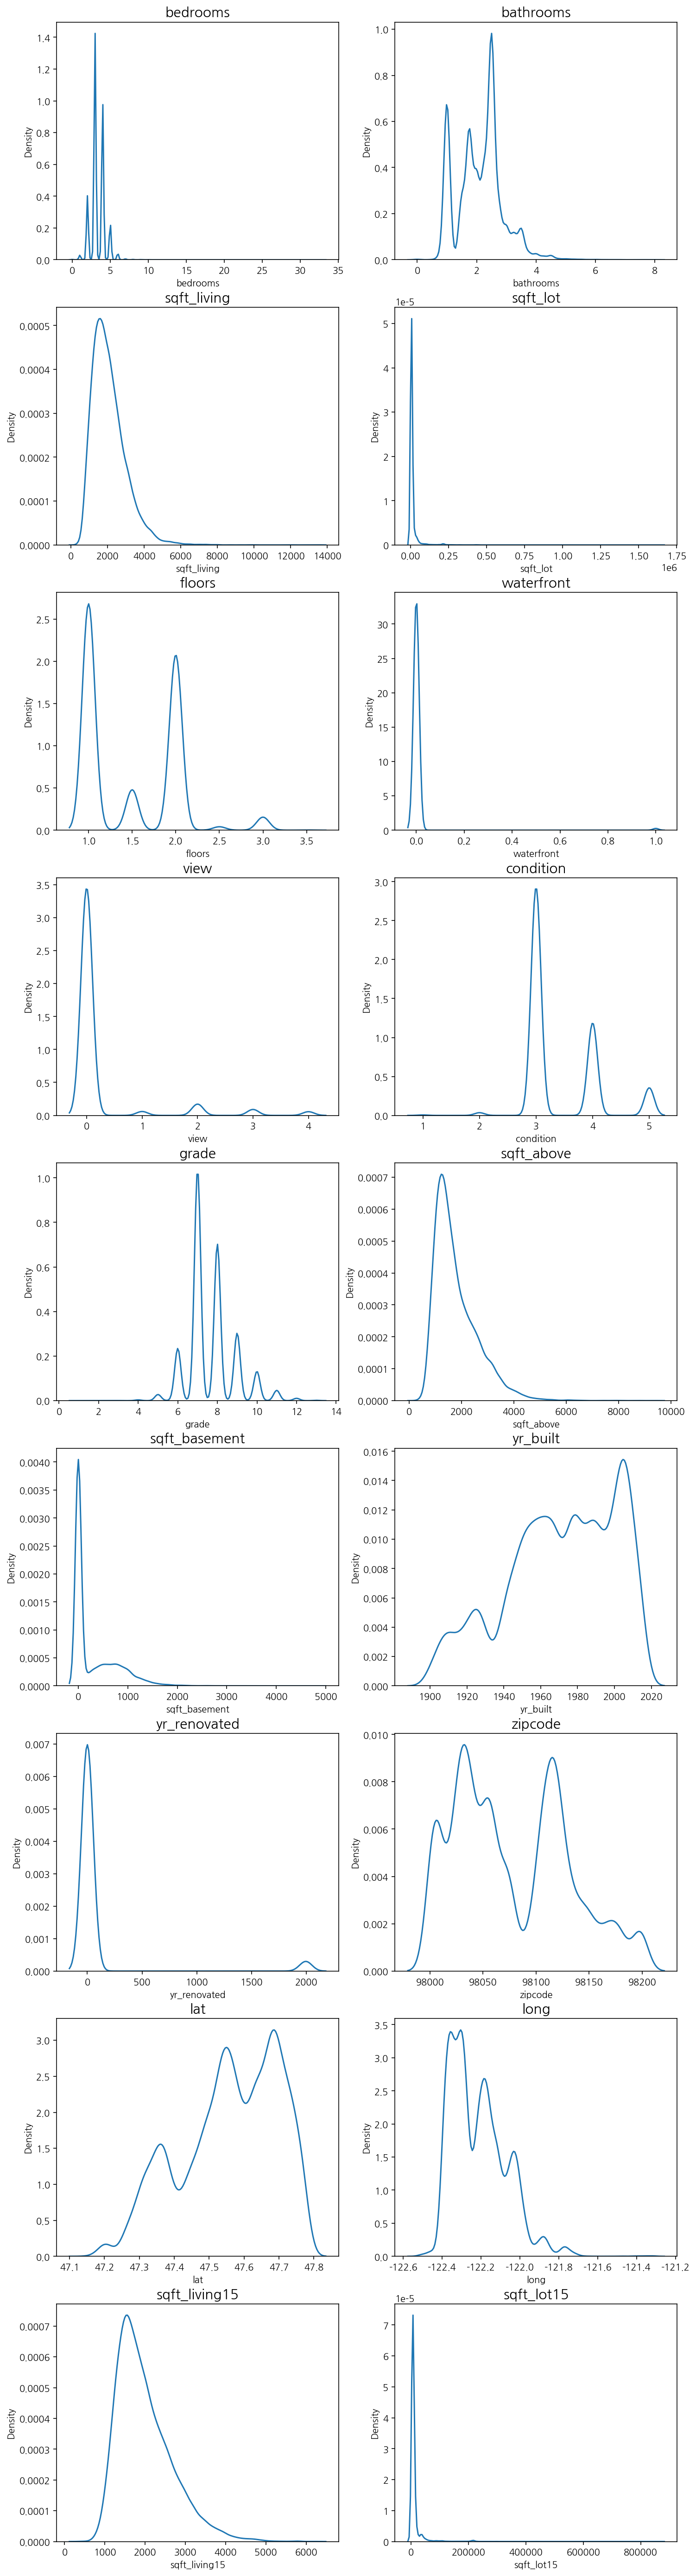

In [39]:
fig, ax = plt.subplots(9, 2, figsize=(12, 50))   # 가로스크롤 때문에 그래프 확인이 불편하다면 figsize의 x값을 조절해 보세요. 

# id 변수(count==0인 경우)는 제외하고 분포를 확인합니다.
count = 1
columns = data.columns
for row in range(9):
    for col in range(2):
        sns.kdeplot(data[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 19 :
            break

### 전처리할 컬럼 선별 후 로그 변환

In [40]:
skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

for c in skew_columns:
    data[c] = np.log1p(data[c].values)

print('얍💢')

얍💢


### 각 컬럼별 데이터 분포 확인 (전처리 후)
- 'bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement' 컬럼의 분포가 넓게 퍼짐

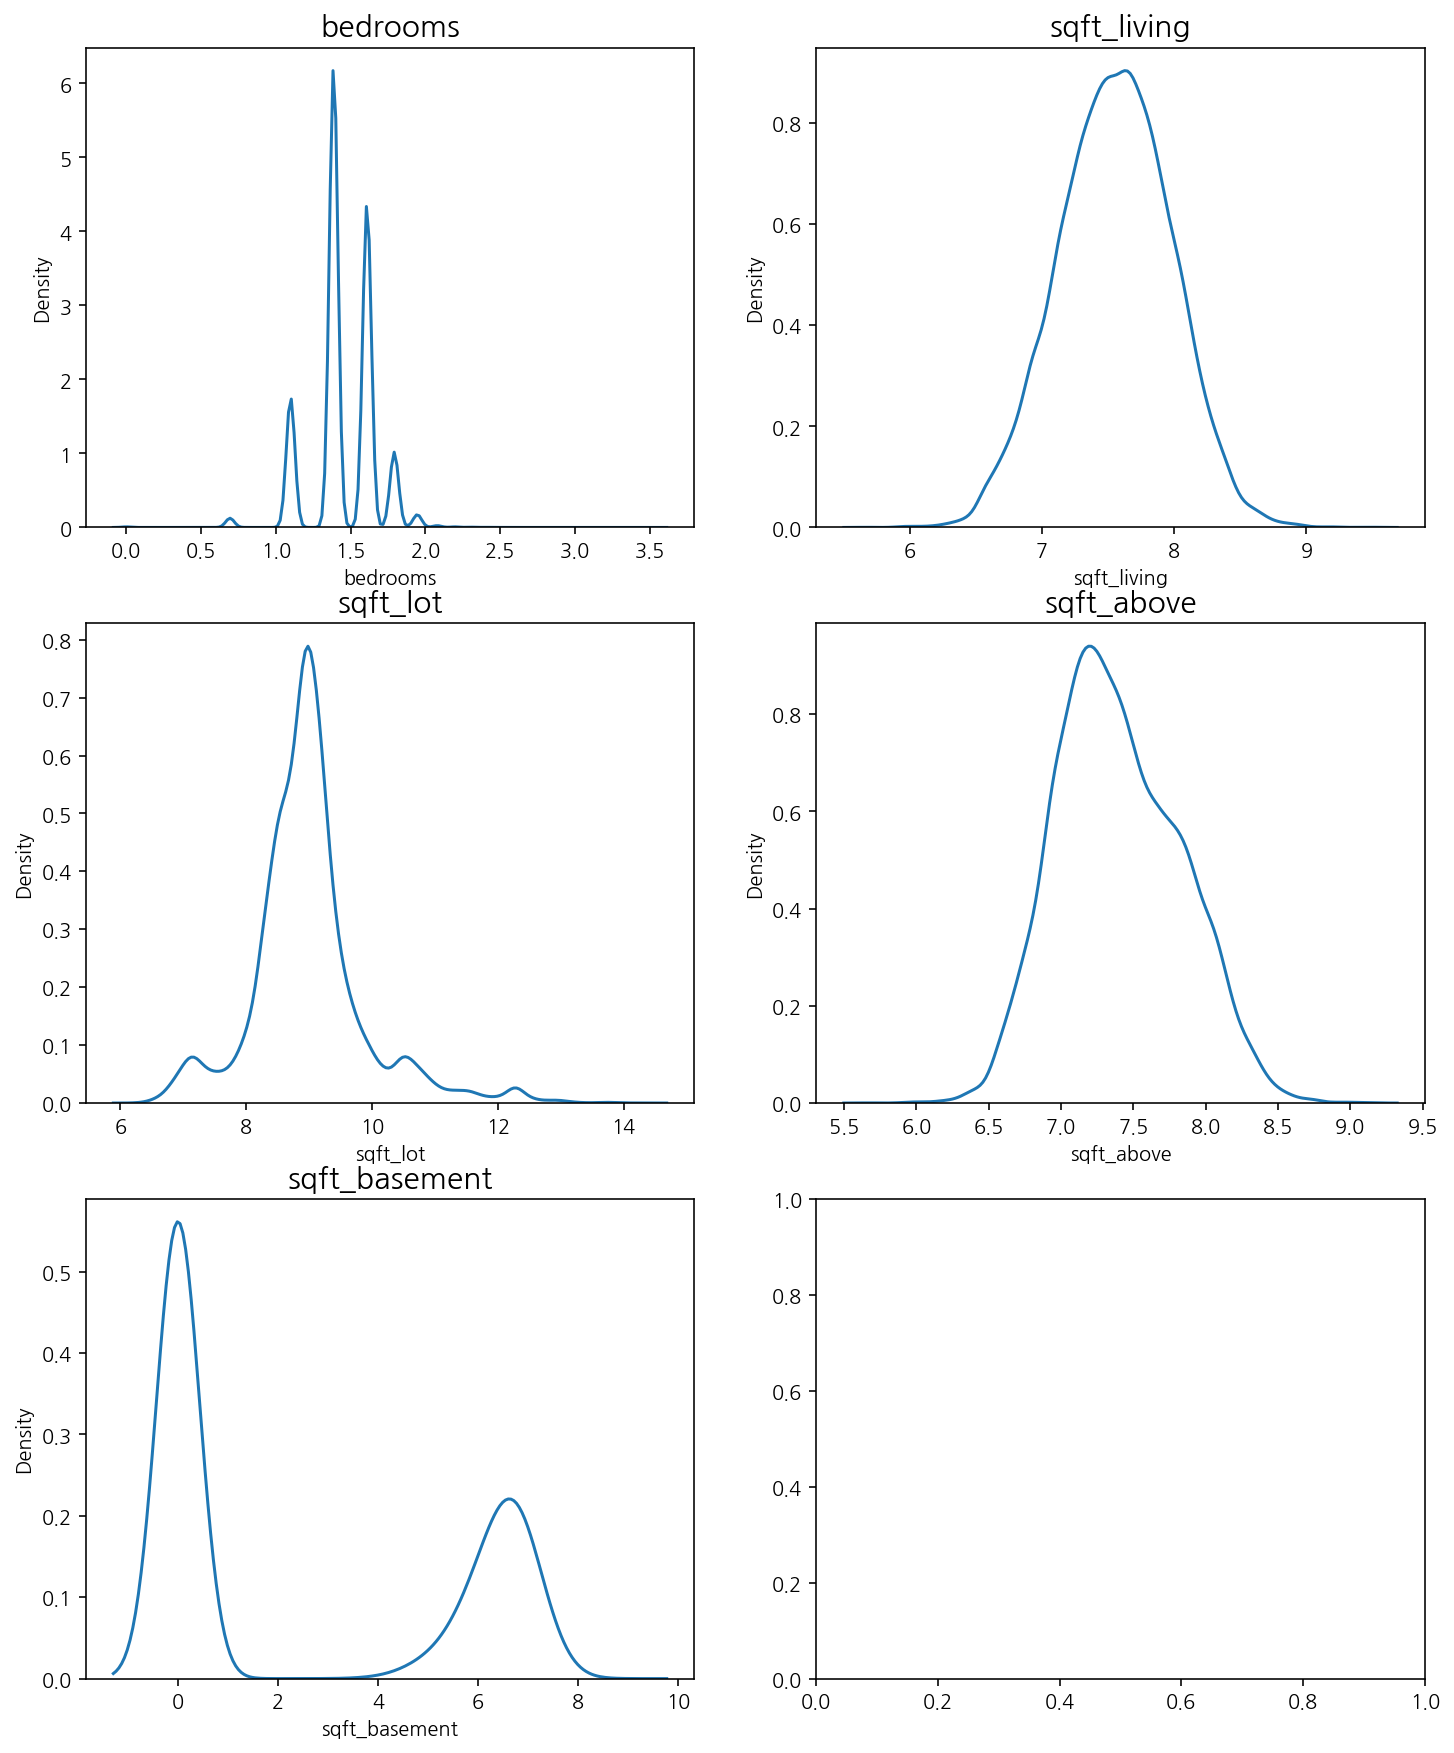

In [41]:
fig, ax = plt.subplots(3, 2, figsize=(12, 15))

count = 0
for row in range(3):
    for col in range(2):
        if count == 5:
            break
        sns.kdeplot(data[skew_columns[count]], ax=ax[row][col])
        ax[row][col].set_title(skew_columns[count], fontsize=15)
        count += 1

**`y`의 분포 로그 변환**

**❗잠깐❗**  
로그 변환을 하는 이유  
아래 그래프를 보면  
`0 < x < 1` 범위에서 `y`는 `-∞ ~ 0` 범위를 가진다.  
1. x: 0에 가깝게 모여있는 값들이 입력되면 
2. y: 매우 큰 범위로 벌어지게 된다.
3. 반대로 x가 커질수록 y는 작은 범위로 퍼지게 된다.
4. 즉, 큰 x값들에 대해서 y값이 크게 차이나지 않는다 -> **넓은 범위를 가지는 x를 비교적 작은 y값의 구간 내에 모이게 하는 특징**

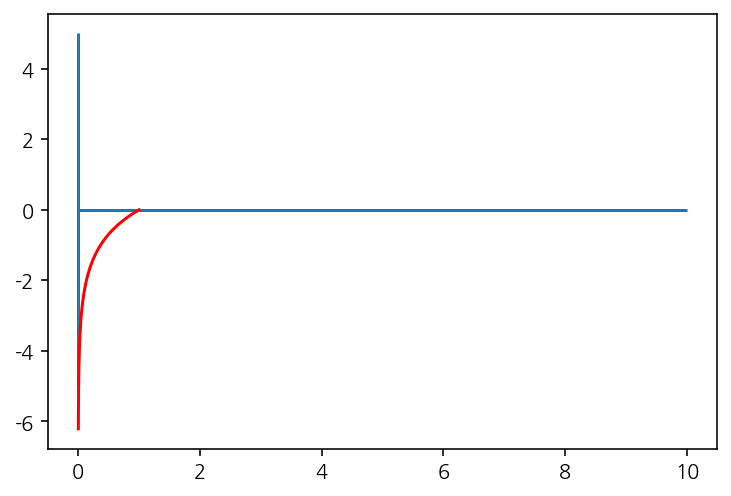

In [14]:
xx = np.linspace(0, 1, 500)
yy = np.log(xx)

plt.hlines(0, 0, 10)
plt.vlines(0, -5, 5)
plt.plot(xx, yy, c='r')
plt.show()

### `y` 분포 확인 (전처리 전)

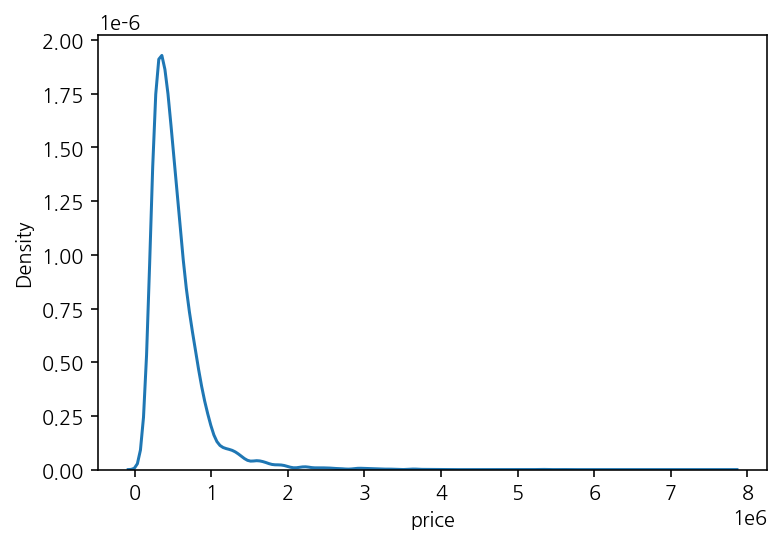

In [42]:
sns.kdeplot(y)
plt.show()

### `y` 로그 변환 및 분포 확인 (전처리 후)

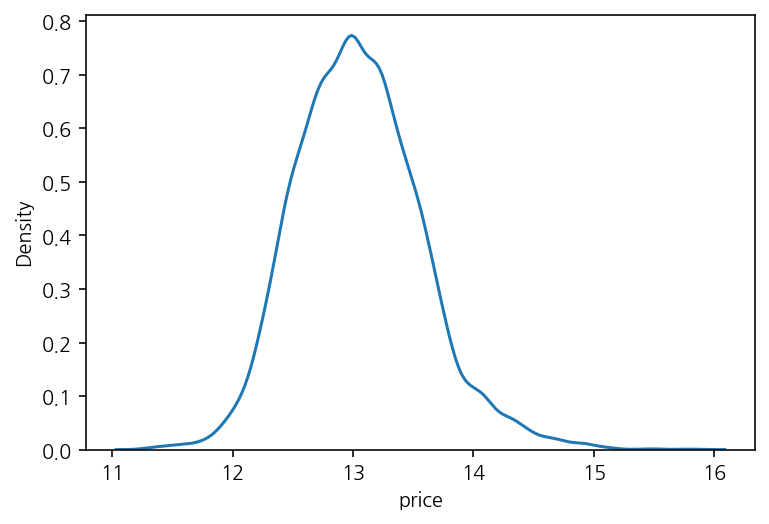

In [43]:
y_log_transformation = np.log1p(y)

sns.kdeplot(y_log_transformation)
plt.show()

### `sub` 데이터 나누기

### `y` 분포 확인 (전처리 전)

In [44]:
sub = data.iloc[train_len:, :]
x = data.iloc[:train_len, :]

print(x.shape)
print(sub.shape)

(15035, 19)
(6468, 19)


### 모델 불러오기

In [45]:
gboost = GradientBoostingRegressor(random_state=2019)
xgboost = xgb.XGBRegressor(random_state=2019)
lightgbm = lgb.LGBMRegressor(random_state=2019)

models = [{'model':gboost, 'name':'GradientBoosting'}, {'model':xgboost, 'name':'XGBoost'},
          {'model':lightgbm, 'name':'LightGBM'}]

print('얍💢')

얍💢


### cv_score 측정 함수 작성

In [47]:
def get_cv_score(models):
    kfold = KFold(n_splits=5, random_state=2019).get_n_splits(x.values)
    for m in models:
        print("Model {} CV score : {:.4f}".format(m['name'], np.mean(cross_val_score(m['model'], x.values, y)), 
                                                  kf=kfold))
print('얍💢')

얍💢


### 각 모델별 cv_score 측정
- Light GBM 선정

In [49]:
get_cv_score(models)

Model GradientBoosting CV score : 0.8597
Model XGBoost CV score : 0.8861
Model LightGBM CV score : 0.8819


### Average Blend 함수 작성

In [50]:
def AveragingBlending(models, x, y, sub_x):
    for m in models : 
        m['model'].fit(x.values, y)
    
    predictions = np.column_stack([
        m['model'].predict(sub_x.values) for m in models
    ])
    return np.mean(predictions, axis=1)

print('얍💢')

얍💢


### Average Blending 실행, 예측

In [51]:
y_pred = AveragingBlending(models, x, y, sub)
print(len(y_pred))
y_pred

6468


array([ 529966.66304912,  430726.21272617, 1361676.91242777, ...,
        452081.69137012,  341572.97685942,  421725.1231835 ])

### 결과값 저장(Submission.csv)

In [54]:
data_dir = os.getenv('HOME')+'/1.AIFFEL_Study/Exploration/E09_My_First_Kaggle/data'

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

,id,price
0,15035,100000
1,15036,100000
2,15037,100000
3,15038,100000
4,15039,100000


In [55]:
result = pd.DataFrame({
    'id' : sub_id, 
    'price' : y_pred
})

result.head()

,id,price
0,15035,5.299667e+05
1,15036,4.307262e+05
2,15037,1.361677e+06
3,15038,3.338036e+05
4,15039,3.089006e+05


In [56]:
my_submission_path = join(data_dir, 'submission.csv')
result.to_csv(my_submission_path, index=False)

print(my_submission_path)

/home/aiffel-dj40/1.AIFFEL_Study/Exploration/E09_My_First_Kaggle/data/submission.csv


## 캐글 제출 결과

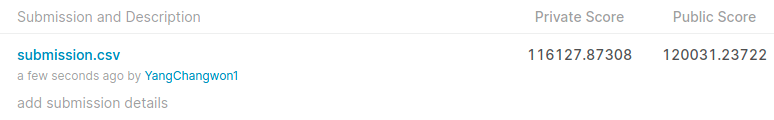

***

# 3. 모델링 (2) - Boosting with GridSearch

## 3-1. 데이터 다시 불러오기 (변수 재할당)

In [57]:
data_dir = os.getenv('HOME')+'/1.AIFFEL_Study/Exploration/E09_My_First_Kaggle/data'

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv')
sample_submission_data_path = join(data_dir,'sample_submission.csv')

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)
sample_submission = pd.read_csv(sample_submission_data_path)

print('train data dim : {}'.format(train.shape)) # 훈련 데이터 형태
print('sub data dim : {}'.format(test.shape))    # 시험 데이터 형태
print('submission dim : {}'.format(sample_submission.shape)) # 제출 샘플 데이터 형태

train data dim : (15035, 21)
sub data dim : (6468, 20)
submission dim : (6468, 2)


\>> **train 데이터 개수: 15,035개, 열은 21개**  
\>> **test 데이터 개수: 6,468개, 열 20개 (학습한 결과로 test의 price를 예측해야함)**  
\>> **제출할 submission에는 열 2개**

### train.csv

In [58]:
train.head() # 위에서 확인한 columns값 21개 확인

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


### test.csv

In [59]:
test.head() # 열은 train과 동일

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15035,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
1,15036,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2,15037,20140512T000000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
3,15038,20150415T000000,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
4,15039,20150312T000000,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


### sample_submission.csv

In [60]:
sample_submission.head()

,id,price
0,15035,100000
1,15036,100000
2,15037,100000
3,15038,100000
4,15039,100000


\>> **<span style="color:red">`test data`에는 `train data`에 있는 `price`가 없다. 학습 후 예측해야하기 때문</span>**  
\>> **`train`, `test`: `date`는 날짜를 뜻하는데 너무 길다. 0번부터 5번까지만 슬라이싱 필요**

### `date`컬럼 정수형 변환 및 6자리만 사용(YY/MM/DD)

In [61]:
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,201410,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,201502,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,201502,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,201406,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,201501,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


### `y`에 가격 할당 및 `train`데이터 프레임에서 삭제

In [62]:
y = train['price']
del train['price']

print(train.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


### `id`컬럼 삭제

In [63]:
del train['id']

print(train.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


### `test`도 동일하게 `date`, `id` 전처리

In [64]:
test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)

del test['id']

print(test.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


### `y` 분포 확인 

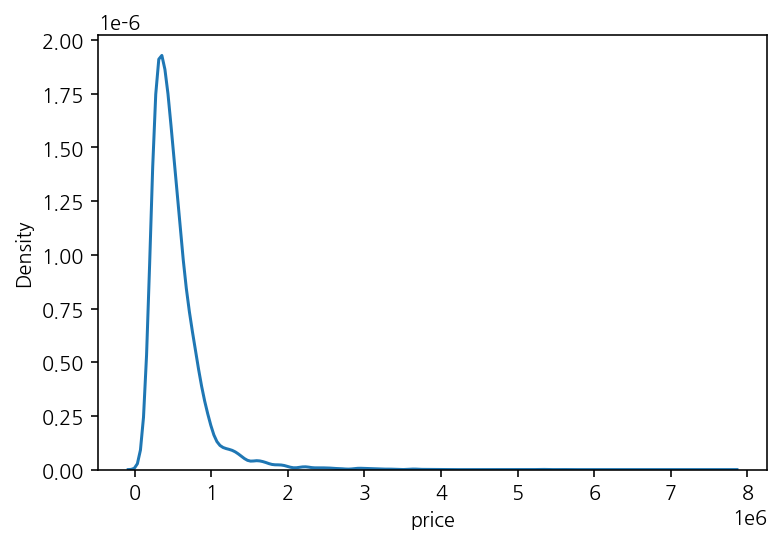

In [67]:
"""
seaborn의 `kdeplot`을 활용해 `y`의 분포를 확인해주세요!
"""
sns.kdeplot(y)
plt.show()
#코드 작성

### `y`로그 변환 및 분포 확인
- 넓게 분포된 것을 확인

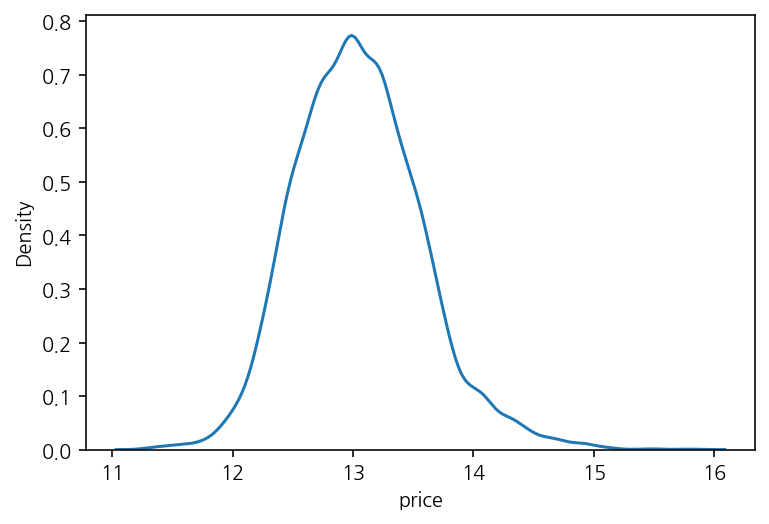

In [68]:
y = np.log1p(y)
sns.kdeplot(y)
plt.show()

### 필요 라이브러리 불러오기

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

print('얍💢')

얍💢


### rmse 측정 함수 작성

In [70]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

print('얍💢')

얍💢


### 모델 불러오기

In [71]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

print('얍💢')

얍💢


In [72]:
# random_state는 모델초기화나 데이터셋 구성에 사용되는 랜덤 시드값입니다. 
#random_state=None    # 이게 초기값입니다. 아무것도 지정하지 않고 None을 넘겨주면 모델 내부에서 임의로 선택합니다.  
random_state=2020        # 하지만 우리는 이렇게 고정값을 세팅해 두겠습니다. 

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]

print('얍💢')

얍💢


### 모델별 rmse 측정하는 함수 작성

In [73]:
def get_scores(models, train, y):
    df = {}

    for model in models:
        model_name = model.__class__.__name__

        X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        df[model_name] = rmse(y_test, y_pred)
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)

    return score_df

### 그리드 탐색

In [74]:
from sklearn.model_selection import GridSearchCV

print('얍💢')

얍💢


### 그리드 탐색, 파라미터별 결과 반환하는 함수 작성

In [87]:
"""
다음과 같은 과정을 진행할 수 있는 `my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)` 함수를 구현해 보세요.

1. GridSearchCV 모델로 `model`을 초기화합니다.
2. 모델을 fitting 합니다.
3. params, score에 각 조합에 대한 결과를 저장합니다. 
4. 데이터 프레임을 생성하고, RMSLE 값을 추가한 후 점수가 높은 순서로 정렬한 `results`를 반환합니다.
"""

# 코드 입력
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    # GridSearchCV 모델로 초기화
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                              cv=5, verbose=verbose, n_jobs=n_jobs)

    # 모델 fitting
    grid_model.fit(train, y)

    # 결과값 저장
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']

    # 데이터 프레임 생성
    results = pd.DataFrame(params)
    results['score'] = score

    # RMSLE 값 계산 후 정렬
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results

### 그리드 탐색 결과
- 최적값: `max_depth=10`, `n_estimators=100`

In [88]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}

model = LGBMRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  20 out of  20 | elapsed:    0.6s finished


,max_depth,n_estimators,score,RMSLE
3,10,100,-0.027027,0.164399
2,10,50,-0.029177,0.170814
1,1,100,-0.055020,0.234564
0,1,50,-0.073394,0.270914


### 예측 및 submission 파일 생성 함수 작성

In [93]:
"""
아래의 과정을 수행하는 `save_submission(model, train, y, test, model_name, rmsle)` 함수를 구현해 주세요.
1. 모델을 `train`, `y`로 학습시킵니다.
2. `test`에 대해 예측합니다.
3. 예측값을 `np.expm1`으로 변환하고, `submission_model_name_RMSLE_100000.csv` 형태의 `csv` 파일을 저장합니다.
"""

# 코드 작성
def save_submission(model, train, y, test, model_name, rmsle=None):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    data_dir_ = os.getenv('HOME')+'/1.AIFFEL_Study/Exploration/E09_My_First_Kaggle/data'
    submission_path = join(data_dir_, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir_, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))

In [94]:
save_submission(model, train, y, test, 'lgbm', rmsle='0.0168')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
/home/aiffel-dj40/1.AIFFEL_Study/Exploration/E09_My_First_Kaggle/data/submission_lgbm_RMSLE_0.0168.csv saved!


## 캐글 제출 결과

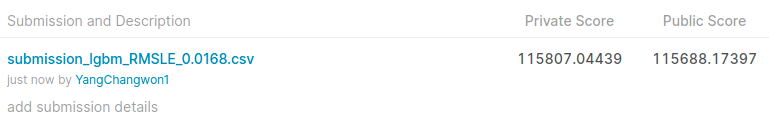

***

### 모델링 (2) - Boosting with GradSearch 결과
- ### Private Score: 115,807.04439
- ### Public Score: 115,688.17397

***

# 4. 모델링 (3) - 스테킹 앙상블

## 4-1. 스테킹 앙상블 함수 작성

In [99]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    # 지정된 n_folds값으로 KFolds 생성
    kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
    # 추후에 메타 모델이 사용할 학습 데이터 반환을 위해 넘파이 배열 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0], 1))
    test_pred = np.zeros((X_test_n.shape[0], 1))
    print(model.__class__.__name__, 'model 시작')
    
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
        print('\t 폴드세트: ', folder_counter, '시작')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]
        
        # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr, y_tr)
        # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        # 입력된 원본 테스트 데이터를 폴드 세트 내 학습된 기반 모델에서 예측 후 데이터 저장.
        
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)
    
    # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터 
    return train_fold_pred, test_pred_mean

### 변수 할당

In [97]:
X_train = train
X_test = test
y_train = y

### 스테킹 앙상블 실행
- 4개의 모델을 각각 학습해 학습한 결과를 저장(최종 모델에 입력으로 사용하기 위해)

In [100]:
# get_stacking_base_datasets()는 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환.
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

# 각 개별 기반(Base) 모델이 생성한 학습용/테스트용 데이터 반환.
gboost_train, gboost_test = get_stacking_base_datasets(gboost, X_train_n, y_train_n, X_test_n, 5)
rdforest_train, rdforest_test = get_stacking_base_datasets(rdforest, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgboost, X_train_n, y_train_n, X_test_n, 5)
lgbm_train, lgbm_test = get_stacking_base_datasets(lightgbm, X_train_n, y_train_n, X_test_n, 5)

# 개별 모델이 반환환 학습 및 테스트용 데이터 세트를 스테킹 형태로 결합
Stack_final_X_train = np.concatenate((gboost_train, rdforest_train, xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((gboost_test, rdforest_test, xgb_test, lgbm_test), axis=1)

GradientBoostingRegressor model 시작
	 폴드세트:  0 시작
	 폴드세트:  1 시작
	 폴드세트:  2 시작
	 폴드세트:  3 시작
	 폴드세트:  4 시작
RandomForestRegressor model 시작
	 폴드세트:  0 시작
	 폴드세트:  1 시작
	 폴드세트:  2 시작
	 폴드세트:  3 시작
	 폴드세트:  4 시작
XGBRegressor model 시작
	 폴드세트:  0 시작
	 폴드세트:  1 시작
	 폴드세트:  2 시작
	 폴드세트:  3 시작
	 폴드세트:  4 시작
LGBMRegressor model 시작
	 폴드세트:  0 시작
	 폴드세트:  1 시작
	 폴드세트:  2 시작
	 폴드세트:  3 시작
	 폴드세트:  4 시작


### 최종 모델 학습
- light GBM 사용

In [101]:
# 최종 메타 모델은 lightgbm 적용
meta_model_lgbm = LGBMRegressor(random_state=2020)

# 개별 모델 예측값을 기반으로 새롭게 만들어진 학습/테스트 데이터로 메타 모델 예측 및 RMSE 측정.
meta_model_lgbm.fit(Stack_final_X_train, y_train)

pred = meta_model_lgbm.predict(Stack_final_X_test)

In [102]:
save_submission(meta_model_lgbm, Stack_final_X_train, y, Stack_final_X_test, 'lgbm', rmsle='stacking')

/home/aiffel-dj40/1.AIFFEL_Study/Exploration/E09_My_First_Kaggle/data/submission_lgbm_RMSLE_stacking.csv saved!


### submission 파일 저장
- 모든 가격 예상값이 같다.....????
- 스테킹 함수를 구축하면서 오류가 있는것 같다...

In [103]:
sample_submission['price'] = pred
# sample_submission = sample_submission.drop(['price'], axis=1)
sample_submission.head()

,id,price
0,15035,11.954613
1,15036,11.954613
2,15037,11.954613
3,15038,11.954613
4,15039,11.954613


### 캐글 제출용 csv 파일 만들기

In [104]:
my_data_dir = os.getenv('HOME') + '/1.AIFFEL_Study/Exploration/E09_My_First_Kaggle/data'
submission_csv_path = join(my_data_dir, 'sample_submission_stacking.csv')
sample_submission.to_csv(submission_csv_path, index=False)
print(submission_csv_path)

/home/aiffel-dj40/1.AIFFEL_Study/Exploration/E09_My_First_Kaggle/data/sample_submission_stacking.csv


### 캐글 제출 결과

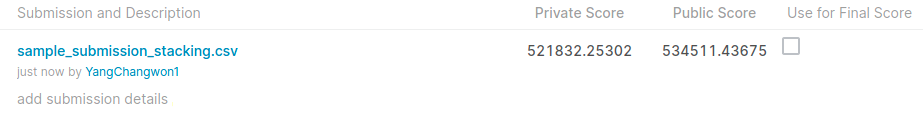

### 모델링 (3) - 스테킹 앙상블 결과
- ### Private Score: 521832.25302
- ### Public Score: 534511.43675

***

# 6. 모델링 (4) - Boosting  with GridSearch(Best Parameter 찾기)

### 탐색할 파라미터 설정

In [105]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [1, 10, 100, 1000, 5000],
    'min_samples_split': [0.01, 0.05, 0.1],
    'max_features': ['auto', 'sqrt'],
}

In [109]:
estimator = LGBMRegressor()

In [110]:
kf = KFold(random_state=30,
           n_splits=10,
           shuffle=True,
          )

### 최적의 파라미터 탐색

In [111]:
# define grid_search
grid_search = GridSearchCV(estimator=estimator, 
                           param_grid=param_grid, 
                           cv=kf, 
                           n_jobs=-1, 
                           verbose=2
                          )

# fit with (x_train, y_train)
grid_search.fit(train, y)

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  1.1min finished


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


GridSearchCV(cv=KFold(n_splits=10, random_state=30, shuffle=True),
             estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 10, 100, 1000, 5000],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [0.01, 0.05, 0.1],
                         'n_estimators': [50, 100, 150, 200, 250]},
             verbose=2)

In [112]:
grid_search.best_params_

{'max_depth': 100,
 'max_features': 'auto',
 'min_samples_split': 0.01,
 'n_estimators': 250}

### param_grid 재설정

In [113]:
param_grid={'max_depth': 100,
 'max_features': 'auto',
 'min_samples_split': 0.01,
 'n_estimators': 250}

In [114]:
model = LGBMRegressor(max_depth=100, n_estimators=200, min_samples_split=0.01, random_state=random_state)

### 캐글 제출용 csv 파일 만들기

In [115]:
save_submission(model, train, y, test, 'lgbm', rmsle='grid_search_best')

/home/aiffel-dj40/1.AIFFEL_Study/Exploration/E09_My_First_Kaggle/data/submission_lgbm_RMSLE_grid_search_best.csv saved!


### 캐글 제출 결과

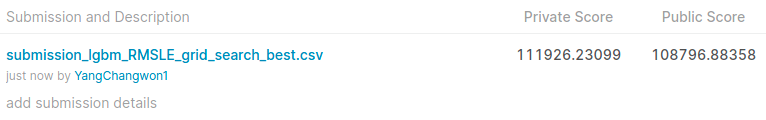

### 모델링 (4) - Boosting with GridSearch(Best Parameter 찾기) 결과
- ### Private Score: 111926.23099
- ### Public Score: 108796.88358

***

#  7. 모델링 (5) - Boosting  with RandomSearch

### 랜덤 탐색 함수 작성

In [116]:
def my_RandomSearch(model, train, y, param_distributions, verbose=2, n_jobs=5):
    # GridSearchCV 모델로 초기화
    random_model = RandomizedSearchCV(model, param_distributions=param_distributions, scoring='neg_mean_squared_error', \
                              cv=5, n_iter=10, verbose=verbose, n_jobs=n_jobs)

    # 모델 fitting
    random_model.fit(train, y)

    # 결과값 저장
    params = random_model.cv_results_['params']
    score = random_model.cv_results_['mean_test_score']

    # 데이터 프레임 생성
    results = pd.DataFrame(params)
    results['score'] = score

    # RMSLE 값 계산 후 정렬
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results

In [117]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distributions = { 
                'n_estimators': randint(low=1, high=200), 
                'max_features': randint(low=1, high=8), 
                }

model = model = LGBMRegressor(random_state=random_state)
my_RandomSearch(model, train, y, param_distributions)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    2.4s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    3.2s finished


[LightGBM] [Warning] Unknown parameter: max_features


,max_features,n_estimators,score,RMSLE
6,3,175,-0.026312,0.162211
7,7,165,-0.026364,0.162369
5,1,161,-0.026385,0.162435
3,4,116,-0.026778,0.163639
0,3,112,-0.026846,0.163846
1,7,107,-0.026887,0.163972
8,1,90,-0.027233,0.165025
2,2,68,-0.027915,0.167079
4,2,52,-0.028969,0.170204
9,7,37,-0.031460,0.177370


### 최적 파라미터 탐색결과
max_features = 3  
n_estimators = 175

In [120]:
model = LGBMRegressor(max_features=3, n_estimators=175, random_state=random_state)
save_submission(model, train, y, test, 'lgbm', rmsle='randomsearch')

/home/aiffel-dj40/1.AIFFEL_Study/Exploration/E09_My_First_Kaggle/data/submission_lgbm_RMSLE_randomsearch.csv saved!


### 캐글 제출 결과

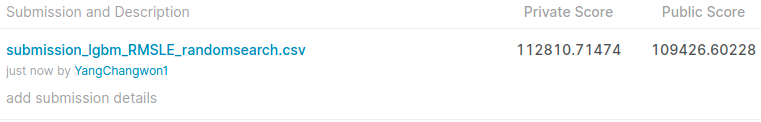

### 모델링 (5) - Boosting with RandomSearch 결과
- ### Private Score: 112810.71474
- ### Public Score: 109426.60228

***

#  8. 모델링 (6) - Boosting  with RandomSearch 2nd

In [119]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distributions = { 
                'n_estimators': randint(low=1, high=200),
                'max_depth' : randint(low=1, high=50), 
                }

model = model = LGBMRegressor(random_state=random_state)
my_RandomSearch(model, train, y, param_distributions)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    2.1s finished


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


,max_depth,n_estimators,score,RMSLE
9,38,183,-0.026295,0.162157
3,17,160,-0.026449,0.162632
5,7,150,-0.026645,0.163232
8,38,97,-0.027071,0.164534
4,20,62,-0.028242,0.168053
1,15,52,-0.028971,0.170207
7,18,30,-0.033890,0.184092
0,28,29,-0.034408,0.185495
6,43,27,-0.035522,0.188474
2,32,24,-0.037878,0.194622


### 최적 파라미터 탐색결과
max_depth = 38   
n_estimators = 183

In [121]:
model = LGBMRegressor(max_depth=38, n_estimators=183, random_state=random_state)
save_submission(model, train, y, test, 'lgbm', rmsle='randomsearch_2')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
/home/aiffel-dj40/1.AIFFEL_Study/Exploration/E09_My_First_Kaggle/data/submission_lgbm_RMSLE_randomsearch_2.csv saved!


### 캐글 제출 결과

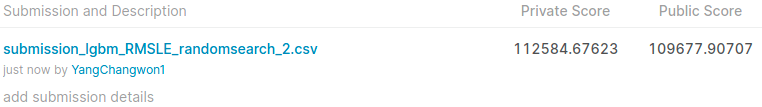

### 모델링 (6) - Boosting with RandomSearch 2nd 결과
- ### Private Score: 112584.67623
- ### Public Score: 109677.90707

***

#  9. 모델링 (7) - 데이터 로그 변환 & Ligth GBM사용
### train data 중 편향된 컬럼은 로그변환

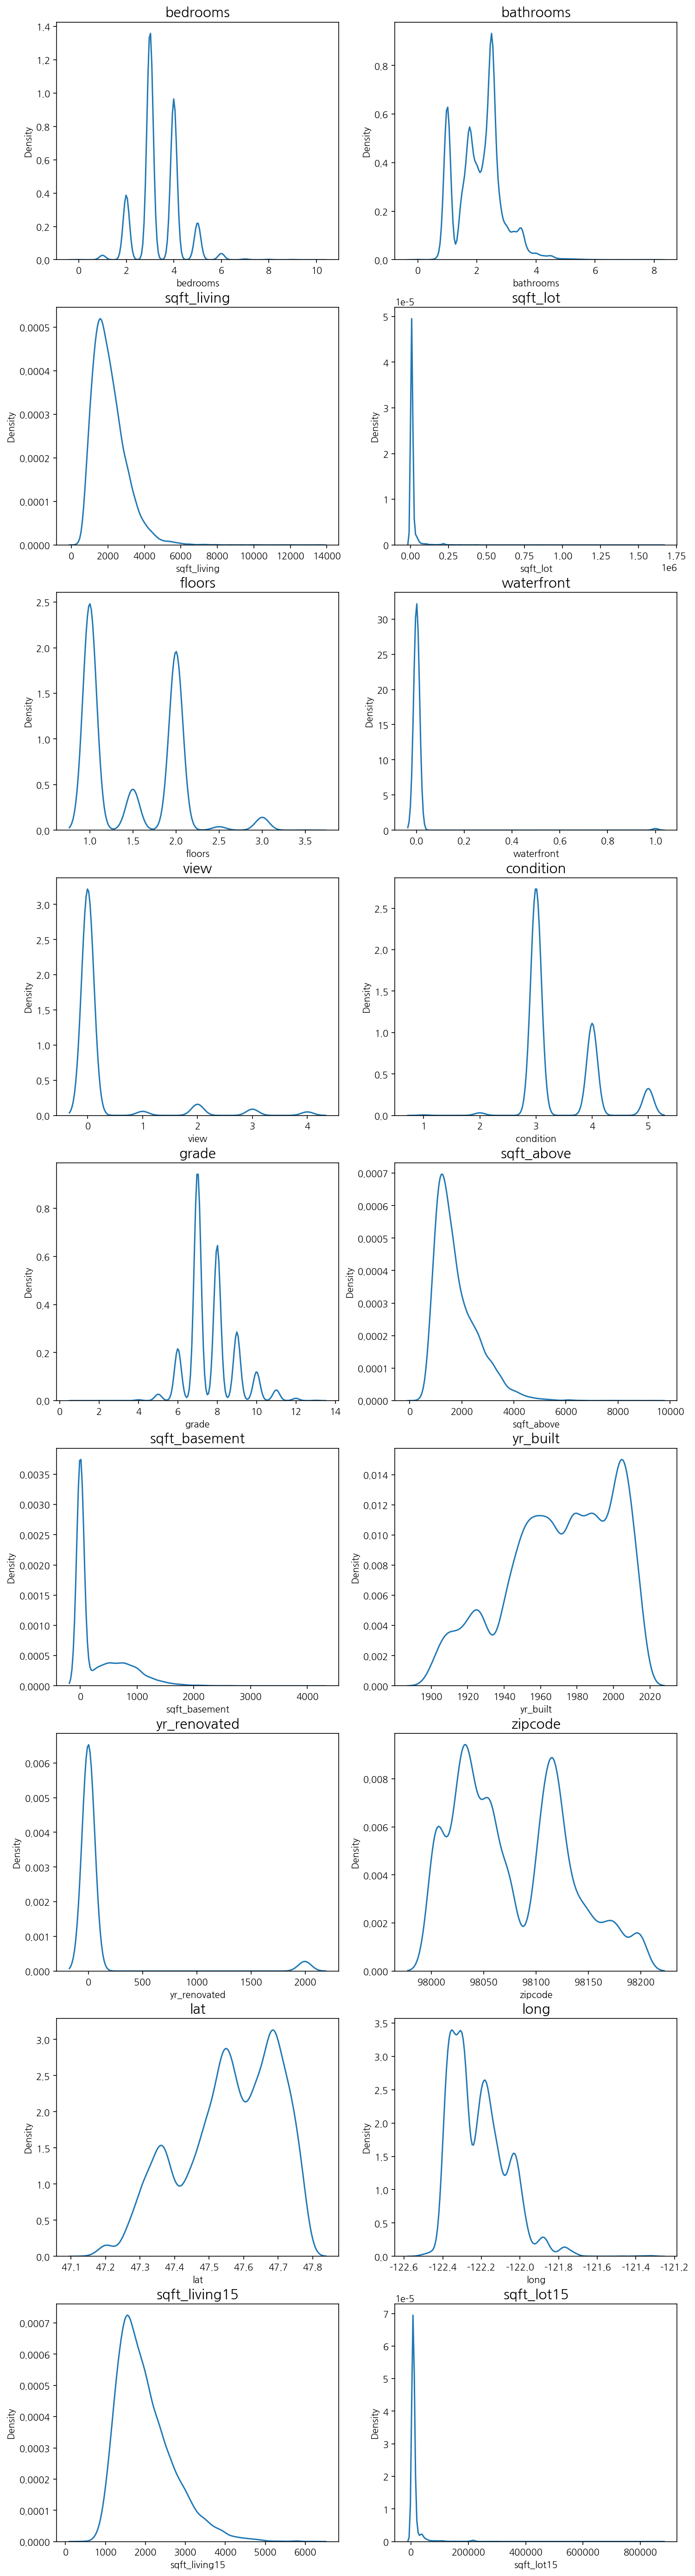

In [122]:
fig, ax = plt.subplots(9, 2, figsize=(12, 50))   # 가로스크롤 때문에 그래프 확인이 불편하다면 figsize의 x값을 조절해 보세요. 

# id 변수(count==0인 경우)는 제외하고 분포를 확인합니다.
count = 1
columns = train.columns
for row in range(9):
    for col in range(2):
        sns.kdeplot(train[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 19 :
            break

In [123]:
skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

for c in skew_columns:
    train[c] = np.log1p(train[c].values)

In [124]:
model = LGBMRegressor(max_depth=10, n_estimators=100, random_state=random_state)

In [125]:
save_submission(model, train, y, test, 'lgbm', rmsle='data_log_ver1')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
/home/aiffel-dj40/1.AIFFEL_Study/Exploration/E09_My_First_Kaggle/data/submission_lgbm_RMSLE_data_log_ver1.csv saved!


### 캐글 제출 결과

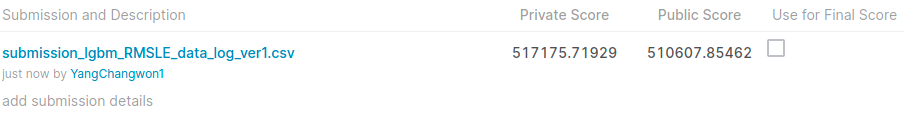

### 모델링 (7) - 데이터 로그 변환 & Ligth GBM사용 결과
- ### Private Score: 517175.71929
- ### Public Score: 510607.85462

***

### train data 원상복구

In [ ]:
# train = pd.read_csv(train_data_path)
# train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)
# del train['price']
# del train['id']

***

# 10. 모델별 결과 요약
- `Private Score`를 기준으로 오름차순으로 정렬하면 `Boosting with GridSearch(Best Parameter 찾기)`가 가장 낮은 것을 알 수 있다.
- 베이스 라인 대비 감소 확인

In [130]:
df = pd.DataFrame(data={'Name' : ['Average Blending', 'Boosting with GridSearch', '스테킹 앙상블', 'Boosting with GridSearch(Best Parameter 찾기)', 'Boosting with RandomSearch', 'Boosting with RandomSearch 2nd', '데이터 로그 변환 & Ligth GBM사용'], 'Private Score' : [116127.87308, 115807.04439, 521832.25302, 111926.23099, 112810.71474, 112584.67623, 517175.71929], 
'Public Score' : [120031.23722, 115688.17397, 534511.43675, 108796.88358, 109426.60228, 109677.90707, 510607.85462]})
df = df.sort_values(by=['Private Score'], ascending=True)
df

,Name,Private Score,Public Score
3,Boosting with GridSearch(Best Parameter 찾기),111926.23099,108796.88358
5,Boosting with RandomSearch 2nd,112584.67623,109677.90707
4,Boosting with RandomSearch,112810.71474,109426.60228
1,Boosting with GridSearch,115807.04439,115688.17397
0,Average Blending,116127.87308,120031.23722
6,데이터 로그 변환 & Ligth GBM사용,517175.71929,510607.85462
2,스테킹 앙상블,521832.25302,534511.43675


***

# 11. 회고

## 11-1. 루브릭

### 1. 캐글 데이터분석 전과정이 성공적으로 진행되었는가?
- 전처리, 모델 학습, 예측의 과정을 거쳐 submission 진행 완료
### 2. 전처리, 학습과정 및 결과에 대한 설명이 시각화를 포함하여 체계적으로 진행되었는가?
- 시각화를 통해 컬럼에 대한 이해와 분포를 확인할 수 있었다.
### 3. 회귀모델 예측정확도가 기준 이상 높게 나왔는가?
- 제공해준 2가지 모델 이외에 5가지 방법을 시도했으나 제시한 Private Score가 110000이하의 목표는 달성하지 못했다.
- 하지만 Public Score에서는 큰 폭의 개선을 확인했다.

## 11-2. 회고

1) 캐글 캐글 말로만 들었는데 실제로 처음 경험해봤고 해커톤에서 경험하며 감각을 익힐 수 있었다.  

2) 베이스 라인 모델이 있어서 백지로 시작하는 것보다 훨씬 훨씬 좋았다. (아마 백지부터 시작했으면 열심히 구글링하며 이해도 못하면서 복붙만 열심히 했을 것이다.)  

3) 또한 모델의 개선을 위한 다양한 방법도 제시해줬다. GridSearch를 이용해 최적의 파라미터를 탐색하는 과정을 익혔고, RandomSearch에 대해 학습할 수 있었다.  

4) **Random Search**의 경우 많은 설명에서 Grid Search보다 더 좋다고 하는데 실제로 적용해봤다! 결과는 확실히 개선되는 것을 확인했다. 말로만 듣는 거랑 실제로 해봐서 경험하는 건 역시 큰 차이이다.  

5) 그래도 **GridSearch 를 최적화**할 수 있지 않을까? 하는 생각이 들어 구글링을 통해 최적의 파라미터를 찾는 코드를 얻어와서 시도해봤다. 그랬더니...Random Search보다 조금 더 개선되는 것을 확인했고 심지어 **가장 높은 점수**를 기록했다. **(1등!)**  

6) 스테킹 앙상블의 경우 좋다는 말을 많이 들어서 직접해보고자 했다! 하지만 많은 시도를 해보고 연구를 해봤지만 예측 결과값이 모두 동일하게 나와 점수가 매우 낮게 나왔다. 아마 제대로 했으면 제일 높은 점수를 얻지 않았을까 하는 생각이 든다.  

7) 마지막은 데이터 로그변환을 통해 Light GBM과 함께 사용해 봤는데... 영 아니였다. (바로 손절..)  

8) 캐글에 대한 도전은 주기적으로 해보고 싶어졌다. 내가 만든 답안지를 바로 채점이 되니 신기하기도 하고 도전 정신을 불러일으킨다. 고득점자들을 살펴보니 한국인들도 꽤 보였다. 언젠가는 **내 코드가 상위에 올라가는 날이 오길 바라며...!!**